In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import pad
from skimage import transform

In [2]:
from train import Transform

/home/mehdi/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/home/mehdi/work/code/scikit-learn/sklearn/cross_validation.py:42: DeprecationWarning: This module has been deprecated in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.19.
  "This module will be removed in 0.19.", DeprecationWarning)


Couldn't import dot_parser, loading of dot files will not be possible.


In [3]:
from lasagnekit.datasets.cifar10 import Cifar10
import matplotlib.pyplot as plt

In [7]:
data = Cifar10(batch_indexes=[1])

In [8]:
data.load()

(-0.99522132, 1.0)
(10, 32, 32, 3)


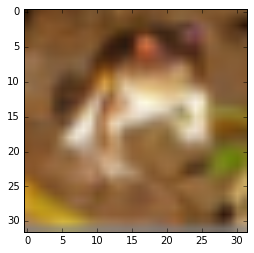

(-0.99411547, 1.0)
(10, 32, 32, 3)


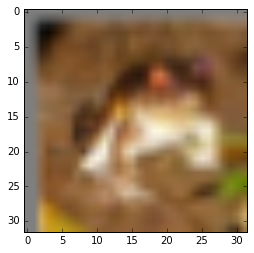

(-0.99995422, 1.0)
(10, 32, 32, 3)


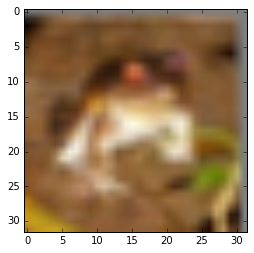

(-0.99708754, 1.0)
(10, 32, 32, 3)


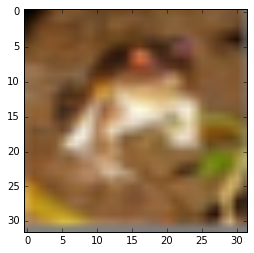

(-0.99833804, 1.0)
(10, 32, 32, 3)


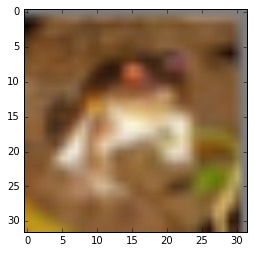

(-0.99353886, 1.0)
(10, 32, 32, 3)


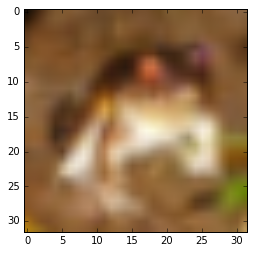

(-0.99703532, 1.0)
(10, 32, 32, 3)


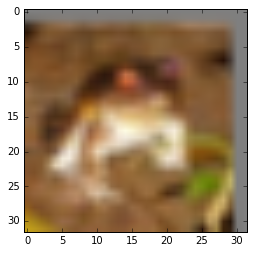

(-0.99777704, 1.0)
(10, 32, 32, 3)


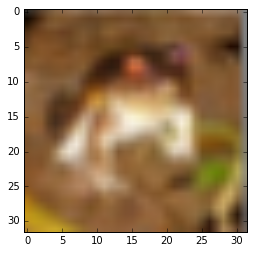

(-0.99754059, 1.0)
(10, 32, 32, 3)


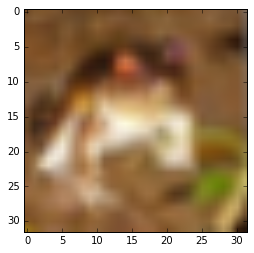

(-0.99718481, 1.0)
(10, 32, 32, 3)


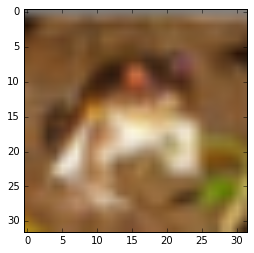

In [41]:
from lasagnekit.datasets.infinite_image_dataset import Transform
from skimage.io import imsave

X = data.X[0:10]
X = X.reshape((X.shape[0], data.img_dim[0], data.img_dim[1], data.img_dim[2]))
X_min = X.min(axis=(0, 2, 3))[None, :, None, None]
X_max = X.max(axis=(0, 2, 3))[None, :, None, None]

X = 2 * ((X - X_min) / (X_max - X_min)) - 1


for i in range(10):
    params = dict(
        rotation_range=(0, 0),
        translation_range=(-3, 3),
        shear_range=(1, 1),
        zoom_range=(1, 1.2),
        do_flip=False
    )
    m, _ = Transform(X.transpose(0, 2, 3, 1),
                      np.random,
                      **params)
    print(m.min(), m.max())
    m = ((m + 1)/2) * 255
    m = m.astype(np.uint8)
    print(m.shape)
    imsave("a.png", m[0])
    plt.imshow(m[0])
    plt.show()

[[[127 127 127]
  [127 127 127]
  [127 127 127]
  ..., 
  [127 127 127]
  [127 127 127]
  [127 127 127]]

 [[127 127 127]
  [127 127 127]
  [127 127 127]
  ..., 
  [127 127 127]
  [127 127 127]
  [127 127 127]]

 [[127 127 127]
  [127 127 127]
  [103 104 105]
  ..., 
  [159 132 108]
  [154 129 106]
  [153 130 108]]

 ..., 
 [[127 127 127]
  [127 127 127]
  [127 127 127]
  ..., 
  [136 100  53]
  [141 104  55]
  [194 158  94]]

 [[127 127 127]
  [127 127 127]
  [127 127 127]
  ..., 
  [130 101  59]
  [119  90  48]
  [182 151  94]]

 [[127 127 127]
  [127 127 127]
  [127 127 127]
  ..., 
  [ 99  76  44]
  [ 62  37  18]
  [135 104  60]]]


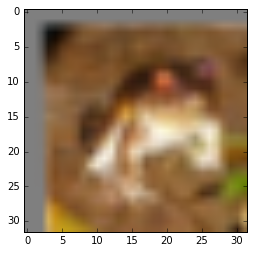

In [37]:
from skimage.io import imread
s=imread("a.png")
print(s)
plt.imshow(s)